In [1]:
import IJulia
import Base64

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = "L3J1bi9tZWRpYS9hbGYvZGF0b3MvbWlzcmVwb3NpdG9yaW9zL2RvY2VuY2lhL2FwcmVuZGl6YWplLWF1dG9tYXRpY28tcHJhY3RpY2FzLWp1bGlh"
  if !isempty(run_path)
    run_path = String(Base64.base64decode(run_path))
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using CSV, DataFrames
df = CSV.read(download("https://aprendeconalf.es/aprendizaje-automatico-practicas-julia/datos/tenis.csv"), DataFrame)

14√ó5 DataFrame
 Row ‚îÇ Cielo     Temperatura  Humedad  Viento   Tenis   
     ‚îÇ String15  String15     String7  String7  String3 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ Soleado   Caluroso     Alta     Suave    No
   2 ‚îÇ Soleado   Caluroso     Alta     Fuerte   No
   3 ‚îÇ Nublado   Caluroso     Alta     Suave    S√≠
   4 ‚îÇ Lluvioso  Moderado     Alta     Suave    S√≠
   5 ‚îÇ Lluvioso  Fr√≠o         Normal   Suave    S√≠
   6 ‚îÇ Lluvioso  Fr√≠o         Normal   Fuerte   No
   7 ‚îÇ Nublado   Fr√≠o         Normal   Fuerte   S√≠
   8 ‚îÇ Soleado   Moderado     Alta     Suave    No
   9 ‚îÇ Soleado   Fr√≠o         Normal   Suave    S√≠
  10 ‚îÇ Lluvioso  Moderado     Normal   Suave    S√≠
  11 ‚îÇ Soleado   Moderado     Normal   Fuerte   S√≠
  12 ‚îÇ Nublado   Moderado     Alta     Fuerte   S√≠
  13 ‚îÇ Nublado   Caluroso     Normal   Suave    S√≠
  14 ‚îÇ Lluvioso  Moderado     Alta     Fuerte   No

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


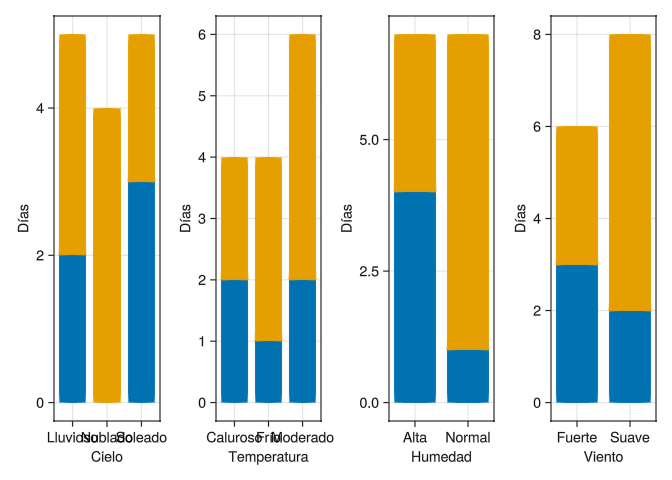

In [3]:
using GLMakie, AlgebraOfGraphics

function frecuencias(df::DataFrame, var::Symbol)
    # Calculamos el n√∫mero de d√≠as de cada clase que se juega al tenis.
    frec = combine(groupby(df, [var, :Tenis]), nrow => :D√≠as)
    # Dibujamos el diagrama de barras.
    plt = data(frec) * 
    mapping(var, :D√≠as, stack = :Tenis, color = :Tenis, ) * 
    visual(BarPlot) 
    # Devolvemos el gr√°fico.
    return plt
end

fig = Figure()
draw!(fig[1, 1], frecuencias(df, :Cielo))
draw!(fig[1, 2], frecuencias(df, :Temperatura))
draw!(fig[1, 3], frecuencias(df, :Humedad))
draw!(fig[1, 4], frecuencias(df, :Viento))
fig

In [4]:
function gini(df::DataFrame, var::Symbol)
    # Calculamos el n√∫mero de ejemplos.
    n = nrow(df)
    # Calculamos las frecuencias absolutas de cada clase.
    frec = combine(groupby(df, var), nrow => :ni)
    # Calculamos la proporci√≥n de cada clase.
    frec.p = frec.ni ./ n
    # Calculamos el √≠ndice de Gini.
    gini = 1 - sum(frec.p .^ 2)
    return gini
end

g0 = gini(df, :Tenis)

0.4591836734693877

In [5]:
using Tidier
# Dividimos el conjunto de ejemplos seg√∫n la variable Humedad.
df_humedad_alta = @filter(df, Humedad == "Alta")
df_humedad_normal = @filter(df, Humedad == "Normal")
# Calculamos los tama√±os de los subconjuntos de ejemplos.
n = nrow(df_humedad_alta), nrow(df_humedad_normal)
# Calculamos el √≠ndice de Gini de cada subconjunto.
gis = gini(df_humedad_alta, :Tenis), gini(df_humedad_normal, :Tenis)
# Calculamos media ponderada de los √≠ndices de Gini de los subconjuntos 
g_humedad = sum(gis .* n) / sum(n)
# Calculamos la reducci√≥n del √≠ndice de Gini.
g0 - g_humedad

0.09183673469387743

In [6]:
# Dividimos el conjunto de ejemplos seg√∫n la variable `Viento`
df_viento_fuerte = @filter(df, Viento == "Fuerte")
df_viento_suave = @filter(df, Viento == "Suave")
# Calculamos los tama√±os de los subconjuntos de ejemplos
n = nrow(df_viento_fuerte), nrow(df_viento_suave)
# Calculamos el √≠ndice de Gini de cada subconjunto
gis = gini(df_viento_fuerte, :Tenis), gini(df_viento_suave, :Tenis)
# Calculamos media ponderada de los √≠ndices de Gini de los subconjuntos
g_viento = sum(gis .* n) / sum(n)
# Calculamos la reducci√≥n del √≠ndice de Gini
g0 - g_viento

0.030612244897959162

In [7]:
using DecisionTree, CategoricalArrays
# Variables predictoras.
X = Matrix(select(df, Not(:Tenis)))
# Variable objetivo.
y = df.Tenis
# Convertir las variables categ√≥ricas a enteros.
X = hcat([levelcode.(categorical(X[:, j])) for j in 1:size(X, 2)]...)
# Convertir la variable objetivo a enteros.
y = levelcode.(categorical(y))
tree = DecisionTreeClassifier(max_depth=3)
fit!(tree, X, y)

DecisionTreeClassifier
max_depth:                3
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [1, 2]
root:                     Decision Tree
Leaves: 6
Depth:  3

In [8]:
print_tree(tree, feature_names=names(df)[1:end-1])

Feature 3: "Humedad" < 2.0 ?


‚îú‚îÄ Feature 1: "Cielo" < 3.0 ?
    ‚îú‚îÄ Feature 4: "Viento" < 2.0 ?
        ‚îú‚îÄ 2 : 1/2
        ‚îî‚îÄ 2 : 2/2
    ‚îî‚îÄ 1 : 3/3
‚îî‚îÄ Feature 4: "Viento" < 2.0 ?
    ‚îú‚îÄ Feature 1: "Cielo" < 2.0 ?
        ‚îú‚îÄ 1 : 1/1
        ‚îî‚îÄ 2 : 2/2
    ‚îî‚îÄ 2 : 4/4


In [9]:
using CSV, DataFrames
df = CSV.read(download("https://aprendeconalf.es/aprendizaje-automatico-practicas-julia/datos/ping√ºinos.csv"), DataFrame, missingstring="NA")

344√ó7 DataFrame
 Row ‚îÇ Especie    Isla       Longitud_pico  Profundidad_pico  Longitud_ala  Pe ‚ãØ
     ‚îÇ String15   String15   Float64?       Float64?          Int64?        In ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ Adelie     Torgersen           39.1              18.7           181     ‚ãØ
   2 ‚îÇ Adelie     Torgersen           39.5              17.4           186
   3 ‚îÇ Adelie     Torgersen           40.3              18.0           195
   4 ‚îÇ Adelie     Torgersen      missing           missing         missing  mi
   5 ‚îÇ Adelie     Torgersen           36.7              19.3           193     ‚ãØ
   6 ‚îÇ Adelie     Torgersen           39.3              20.6           190
   7 ‚îÇ Adelie     Torgersen           38.9              17.8           181
   8 ‚îÇ Adelie     Torgersen           39.2              19.6           195
   9 ‚îÇ Adelie     Torgersen           34.1              18.1           193     ‚ãØ
  10 ‚îÇ Adelie     Torgersen           42.0              20.2           190
  11 ‚îÇ Adelie     Torgersen           37.8              17.1           186
  ‚ãÆ  ‚îÇ     ‚ãÆ          ‚ãÆ            ‚ãÆ               ‚ãÆ               ‚ãÆ           ‚ã±
 335 ‚îÇ Chinstrap  Dream               50.2              18.8           202
 336 ‚îÇ Chinstrap  Dream               45.6              19.4           194     ‚ãØ
 337 ‚îÇ Chinstrap  Dream               51.9              19.5           206
 338 ‚îÇ Chinstrap  Dream               46.8              16.5           189
 339 ‚îÇ Chinstrap  Dream               45.7              17.0           195
 340 ‚îÇ Chinstrap  Dream               55.8              19.8           207     ‚ãØ
 341 ‚îÇ Chinstrap  Dream               43.5              18.1           202
 342 ‚îÇ Chinstrap  Dream               49.6              18.2           193
 343 ‚îÇ Chinstrap  Dream               50.8              19.0           210
 344 ‚îÇ Chinstrap  Dream               50.2              18.7           198     ‚ãØ
                                                  2 columns and 323 rows omitted

In [10]:
describe(df, :nmissing)

7√ó2 DataFrame
 Row ‚îÇ variable          nmissing 
     ‚îÇ Symbol            Int64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ Especie                  0
   2 ‚îÇ Isla                     0
   3 ‚îÇ Longitud_pico            2
   4 ‚îÇ Profundidad_pico         2
   5 ‚îÇ Longitud_ala             2
   6 ‚îÇ Peso                     2
   7 ‚îÇ Sexo                    11

In [11]:
dropmissing!(df)

333√ó7 DataFrame
 Row ‚îÇ Especie    Isla       Longitud_pico  Profundidad_pico  Longitud_ala  Pe ‚ãØ
     ‚îÇ String15   String15   Float64        Float64           Int64         In ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ Adelie     Torgersen           39.1              18.7           181   3 ‚ãØ
   2 ‚îÇ Adelie     Torgersen           39.5              17.4           186   3
   3 ‚îÇ Adelie     Torgersen           40.3              18.0           195   3
   4 ‚îÇ Adelie     Torgersen           36.7              19.3           193   3
   5 ‚îÇ Adelie     Torgersen           39.3              20.6           190   3 ‚ãØ
   6 ‚îÇ Adelie     Torgersen           38.9              17.8           181   3
   7 ‚îÇ Adelie     Torgersen           39.2              19.6           195   4
   8 ‚îÇ Adelie     Torgersen           41.1              17.6           182   3
   9 ‚îÇ Adelie     Torgersen           38.6              21.2           191   3 ‚ãØ
  10 ‚îÇ Adelie     Torgersen           34.6              21.1           198   4
  11 ‚îÇ Adelie     Torgersen           36.6              17.8           185   3
  ‚ãÆ  ‚îÇ     ‚ãÆ          ‚ãÆ            ‚ãÆ               ‚ãÆ               ‚ãÆ           ‚ã±
 324 ‚îÇ Chinstrap  Dream               50.2              18.8           202   3
 325 ‚îÇ Chinstrap  Dream               45.6              19.4           194   3 ‚ãØ
 326 ‚îÇ Chinstrap  Dream               51.9              19.5           206   3
 327 ‚îÇ Chinstrap  Dream               46.8              16.5           189   3
 328 ‚îÇ Chinstrap  Dream               45.7              17.0           195   3
 329 ‚îÇ Chinstrap  Dream               55.8              19.8           207   4 ‚ãØ
 330 ‚îÇ Chinstrap  Dream               43.5              18.1           202   3
 331 ‚îÇ Chinstrap  Dream               49.6              18.2           193   3
 332 ‚îÇ Chinstrap  Dream               50.8              19.0           210   4
 333 ‚îÇ Chinstrap  Dream               50.2              18.7           198   3 ‚ãØ
                                                  2 columns and 312 rows omitted

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


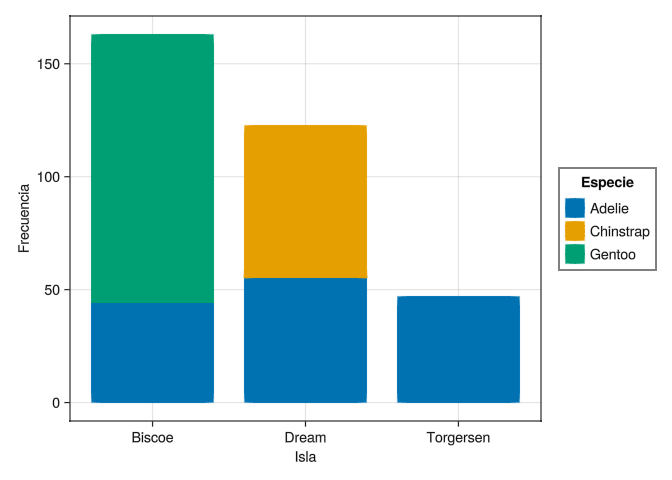

In [12]:
using GLMakie, AlgebraOfGraphics

frec_isla = combine(groupby(df, [:Isla, :Especie]), nrow => :Frecuencia)
data(frec_isla) * 
    mapping(:Isla, :Frecuencia, stack = :Especie, color =:Especie) *
    visual(BarPlot) |> draw

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


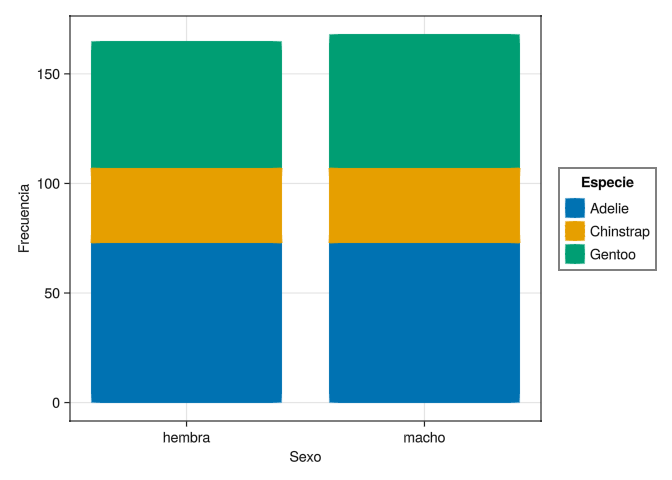

In [13]:
frec_sexo = combine(groupby(df, [:Sexo, :Especie]), nrow => :Frecuencia)
data(frec_sexo) * 
    mapping(:Sexo, :Frecuencia, stack = :Especie, color =:Especie) *
    visual(BarPlot) |> draw

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


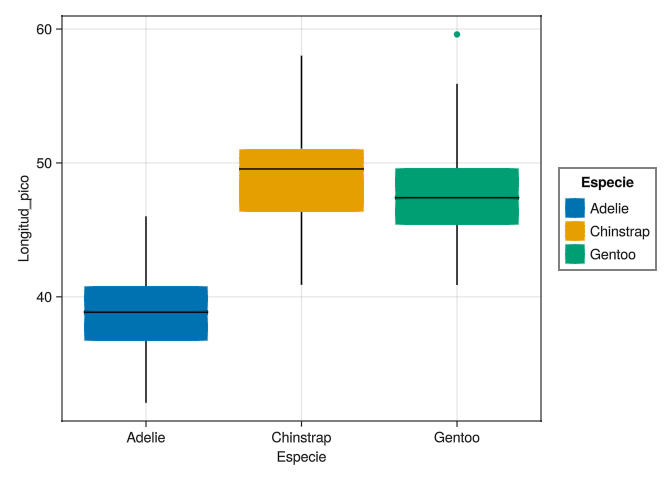

In [14]:
function cajas(df, var, clase)
    data(df) *
        mapping(clase, var, color = clase) *
        visual(BoxPlot) |> 
        draw
end

cajas(df, :Longitud_pico, :Especie)

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


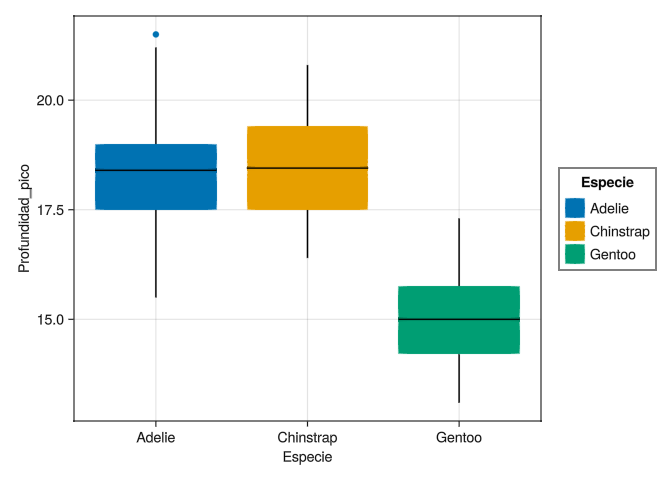

In [15]:
cajas(df, :Profundidad_pico, :Especie)

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


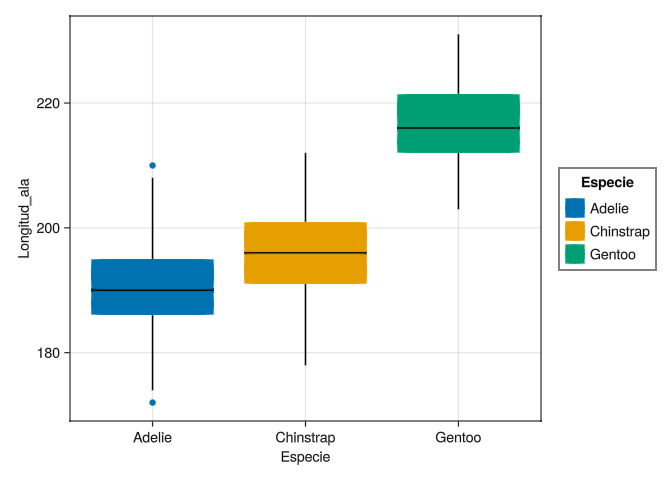

In [16]:
cajas(df, :Longitud_ala, :Especie)

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


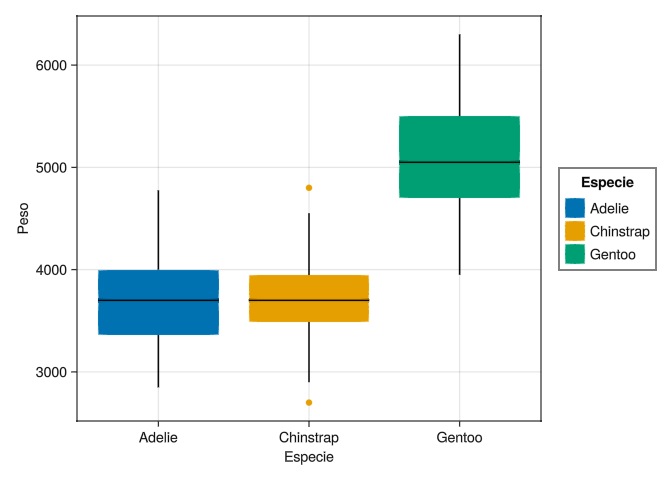

In [17]:
cajas(df, :Peso, :Especie)

In [18]:
using Tidier
function gini(df::DataFrame, var::Symbol)
    n = nrow(df)
    frec = combine(groupby(df, var), nrow => :ni)
    frec.p = frec.ni ./ n
    gini = 1 - sum(frec.p .^ 2)
    return gini
end

function reduccion_impureza(df::DataFrame, var::Symbol, val::Number)
    # Dividimos el conjunto de ejemplos seg√∫n la longitud del pico es menor de 44.
    df_menor = @eval @filter($df, $var <= $val)
    df_mayor = @eval @filter($df, $var > $val)
    # Calculamos los tama√±os de los subconjuntos de ejemplos.
    n = nrow(df_menor), nrow(df_mayor)
    # Calculamos el √≠ndice de Gini de cada subconjunto.
    gis = gini(df_menor, :Especie), gini(df_mayor, :Especie)
    # Calculamos media ponderada de los √≠ndices de Gini de los subconjuntos.
    g1 = sum(gis .* n) / sum(n)
    # Calculamos la reducci√≥n del √≠ndice de Gini.
    gini(df, :Especie) - g1
end

reduccion_impureza(df, :Longitud_pico, 44)

0.26577182779353914

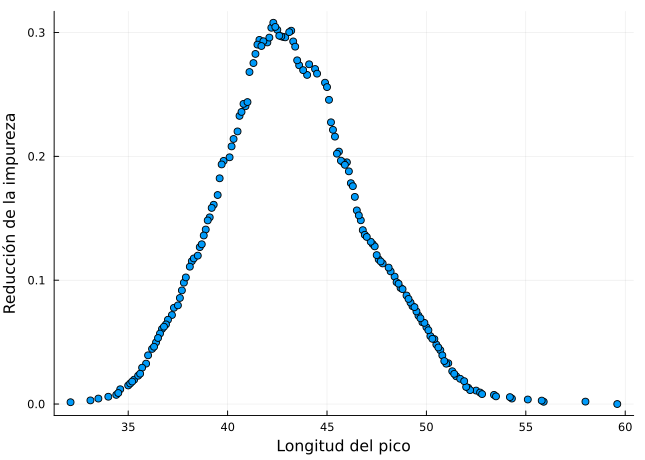

In [19]:
using Plots
# Valores √∫nicos de longitud del pico.
valores = unique(df.Longitud_pico)
# Reducci√≥n de la impureza para cada valor.
reducciones = [reduccion_impureza(df, :Longitud_pico, val) for val in valores]
# Graficamos el resultado.
Plots.scatter(valores, reducciones, xlabel = "Longitud del pico", ylabel = "Reducci√≥n de la impureza", legend = false)

In [20]:
val_optimo = valores[argmax(reducciones)]

42.3

In [21]:
using Random
# Establecemos la semilla para la reproducibilidad.
Random.seed!(1234)
# Barajamos el dataframe.
df = shuffle(df)
# Dividimos el dataframe en un conjunto de entrenamiento y un conjunto de test.
n = nrow(df)
df_test = df[1:div(n, 4), :]
df_train = df[div(n, 4)+1:end, :]

250√ó7 DataFrame
 Row ‚îÇ Especie    Isla       Longitud_pico  Profundidad_pico  Longitud_ala  Pe ‚ãØ
     ‚îÇ String15   String15   Float64        Float64           Int64         In ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ Adelie     Dream               39.0              18.7           185   3 ‚ãØ
   2 ‚îÇ Chinstrap  Dream               52.8              20.0           205   4
   3 ‚îÇ Chinstrap  Dream               55.8              19.8           207   4
   4 ‚îÇ Adelie     Torgersen           35.1              19.4           193   4
   5 ‚îÇ Adelie     Torgersen           34.6              21.1           198   4 ‚ãØ
   6 ‚îÇ Gentoo     Biscoe              50.0              15.2           218   5
   7 ‚îÇ Chinstrap  Dream               50.6              19.4           193   3
   8 ‚îÇ Chinstrap  Dream               43.5              18.1           202   3
   9 ‚îÇ Adelie     Dream               36.9              18.6           189   3 ‚ãØ
  10 ‚îÇ Adelie     Dream               36.6              18.4           184   3
  11 ‚îÇ Chinstrap  Dream               46.6              17.8           193   3
  ‚ãÆ  ‚îÇ     ‚ãÆ          ‚ãÆ            ‚ãÆ               ‚ãÆ               ‚ãÆ           ‚ã±
 241 ‚îÇ Chinstrap  Dream               49.8              17.3           198   3
 242 ‚îÇ Gentoo     Biscoe              49.8              15.9           229   5 ‚ãØ
 243 ‚îÇ Chinstrap  Dream               50.8              18.5           201   4
 244 ‚îÇ Gentoo     Biscoe              50.7              15.0           223   5
 245 ‚îÇ Gentoo     Biscoe              46.2              14.1           217   4
 246 ‚îÇ Adelie     Torgersen           35.5              17.5           190   3 ‚ãØ
 247 ‚îÇ Adelie     Biscoe              39.7              18.9           184   3
 248 ‚îÇ Gentoo     Biscoe              47.7              15.0           216   4
 249 ‚îÇ Adelie     Torgersen           42.9              17.6           196   4
 250 ‚îÇ Adelie     Dream               40.8              18.9           208   4 ‚ãØ
                                                  2 columns and 229 rows omitted

In [22]:
using DecisionTree, CategoricalArrays
# Variables predictivas.
X_train = Matrix(select(df_train, Not(:Isla, :Especie)))
# Variable objetivo.
y_train = df_train.Especie
# Convertir las variables categ√≥ricas a enteros.
X_train = hcat([levelcode.(categorical(X_train[:, j])) for j in 1:size(X_train, 2)]...)
# Convertir la variable objetivo a enteros
y_train = levelcode.(categorical(y_train))

# Construimos el √°rbol de decisi√≥n con profundidad m√°xima 3.
tree = DecisionTreeClassifier(max_depth = 3)
fit!(tree, X_train, y_train)
print_tree(tree, feature_names=names(df)[3:end])

Feature 3: "Longitud_ala" < 29.0 ?


‚îú‚îÄ Feature 1: "Longitud_pico" < 62.0 ?
    ‚îú‚îÄ 1 : 96/96
    ‚îî‚îÄ Feature 1: "Longitud_pico" < 87.0 ?
        ‚îú‚îÄ 2 : 10/20
        ‚îî‚îÄ 2 : 37/38
‚îî‚îÄ Feature 2: "Profundidad_pico" < 46.0 ?
    ‚îú‚îÄ 3 : 90/90
    ‚îî‚îÄ Feature 1: "Longitud_pico" < 109.0 ?
        ‚îú‚îÄ 1 : 2/2
        ‚îî‚îÄ 2 : 4/4


In [23]:
using StatisticalMeasures
# Variables predictivas
X_test = Matrix(select(df_test, Not(:Isla, :Especie)))
# Variable objetivo
y_test = df_test.Especie
# Convertir las variables categ√≥ricas a enteros
X_test = hcat([levelcode.(categorical(X_test[:, j])) for j in 1:size(X_test, 2)]...)
# Convertir la variable objetivo a enteros
y_test = levelcode.(categorical(y_test))
# Predecimos la especie de ping√ºino del conjunto de test
y_pred = predict(tree, X_test)
# Calculamos la precisi√≥n del modelo
confmat(y_pred, y_test)

          ‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
          ‚îÇ Ground Truth ‚îÇ
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇPredicted‚îÇ 1  ‚îÇ 2  ‚îÇ 3  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ    1    ‚îÇ 38 ‚îÇ 11 ‚îÇ 9  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ    2    ‚îÇ 0  ‚îÇ 6  ‚îÇ 0  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ    3    ‚îÇ 0  ‚îÇ 0  ‚îÇ 19 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [24]:
# Calculamos la precisi√≥n del modelo
accuracy(y_pred, y_test)

0.7590361445783133

In [25]:
using CSV, DataFrames
df = CSV.read(download("https://aprendeconalf.es/aprendizaje-automatico-practicas-julia/datos/vinos.csv"), DataFrame)

5320√ó14 DataFrame
  Row ‚îÇ tipo     meses_barrica  acided_fija  acided_volatil  acido_citrico  az ‚ãØ
      ‚îÇ String7  Int64          Float64      Float64         Float64        Fl ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    1 ‚îÇ blanco               0          7.0           0.27            0.36     ‚ãØ
    2 ‚îÇ blanco               0          6.3           0.3             0.34
    3 ‚îÇ blanco               0          8.1           0.28            0.4
    4 ‚îÇ blanco               0          7.2           0.23            0.32
    5 ‚îÇ blanco               0          6.2           0.32            0.16     ‚ãØ
    6 ‚îÇ blanco               0          8.1           0.22            0.43
    7 ‚îÇ blanco               0          8.1           0.27            0.41
    8 ‚îÇ blanco               0          8.6           0.23            0.4
    9 ‚îÇ blanco               0          7.9           0.18            0.37     ‚ãØ
   10 ‚îÇ blanco               0          6.6           0.16            0.4
   11 ‚îÇ blanco               0          8.3           0.42            0.62
  ‚ãÆ   ‚îÇ    ‚ãÆ           ‚ãÆ             ‚ãÆ             ‚ãÆ               ‚ãÆ           ‚ã±
 5311 ‚îÇ tinto               10          7.2           0.66            0.33
 5312 ‚îÇ tinto                3          6.6           0.725           0.2      ‚ãØ
 5313 ‚îÇ tinto                7          6.3           0.55            0.15
 5314 ‚îÇ tinto                9          5.4           0.74            0.09
 5315 ‚îÇ tinto                3          6.3           0.51            0.13
 5316 ‚îÇ tinto                3          6.8           0.62            0.08     ‚ãØ
 5317 ‚îÇ tinto                5          6.2           0.6             0.08
 5318 ‚îÇ tinto               10          5.9           0.55            0.1
 5319 ‚îÇ tinto                6          5.9           0.645           0.12
 5320 ‚îÇ tinto                3          6.0           0.31            0.47     ‚ãØ
                                                 9 columns and 5299 rows omitted

In [26]:
using MLJ
schema(df)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ names                ‚îÇ scitypes   ‚îÇ types   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ tipo                 ‚îÇ Textual    ‚îÇ String7 ‚îÇ
‚îÇ meses_barrica        ‚îÇ Count      ‚îÇ Int64   ‚îÇ
‚îÇ acided_fija          ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ acided_volatil       ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ acido_citrico        ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ azucar_residual      ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ cloruro_sodico       ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ dioxido_azufre_libre ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ dioxido_azufre_total ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ densidad             ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ ph                   ‚îÇ Continuous ‚îÇ Float64 ‚îÇ
‚îÇ sulfatos             ‚îÇ Continuous ‚îÇ 

In [27]:
describe(df, :nmissing)

14√ó2 DataFrame
 Row ‚îÇ variable              nmissing 
     ‚îÇ Symbol                Int64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ tipo                         0
   2 ‚îÇ meses_barrica                0
   3 ‚îÇ acided_fija                  0
   4 ‚îÇ acided_volatil               0
   5 ‚îÇ acido_citrico                0
   6 ‚îÇ azucar_residual              0
   7 ‚îÇ cloruro_sodico               0
   8 ‚îÇ dioxido_azufre_libre         0
   9 ‚îÇ dioxido_azufre_total         0
  10 ‚îÇ densidad                     0
  11 ‚îÇ ph                           0
  12 ‚îÇ sulfatos                     0
  13 ‚îÇ alcohol                      0
  14 ‚îÇ calidad                      0

In [28]:
using CategoricalArrays
# Recodificamos la variable calidad.
df.calidad = cut(df.calidad, [0, 6.5, 10], labels = [" ‚òπÔ∏è ", " üòä "])

5320-element CategoricalArray{String,1,UInt32}:
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " üòä "
 " ‚òπÔ∏è "
 " üòä "
 " ‚òπÔ∏è "
 ‚ãÆ
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "

In [29]:
y, X = unpack(df, ==(:calidad), rng = 123)

(CategoricalValue{String, UInt32}[" ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " üòä ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è "  ‚Ä¶  " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è ", " ‚òπÔ∏è "], 5320√ó13 DataFrame
  Row ‚îÇ tipo     meses_barrica  acided_fija  acided_volatil  acido_citrico  az ‚ãØ
      ‚îÇ String7  Int64          Float64      Float64         Float64        Fl ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    1 ‚îÇ blanco               0          6.7           0.5             0.36     ‚ãØ
    2 ‚îÇ blanco               0          6.3           0.2             0.3
    3 ‚îÇ blanco               0          6.2           0.35            0.03
    4 ‚îÇ tinto                3          8.0         

In [30]:
# Convertir las variables categ√≥ricas a enteros.
coerce!(X, :tipo => OrderedFactor, :meses_barrica => Continuous)
schema(X)

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ names                ‚îÇ scitypes         ‚îÇ types                             ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ tipo                 ‚îÇ OrderedFactor{2} ‚îÇ CategoricalValue{String7, UInt32} ‚îÇ
‚îÇ meses_barrica        ‚îÇ Continuous       ‚îÇ Float64                           ‚îÇ
‚îÇ acided_fija          ‚îÇ Continuous       ‚îÇ Float64                           ‚îÇ
‚îÇ acided_volatil       ‚îÇ Continuous       ‚îÇ Float64                           ‚îÇ
‚îÇ acido_citrico        ‚îÇ Continuous       ‚îÇ Float64                           

In [31]:
# Cargamos el tipo de modelo.
Tree = @iload DecisionTreeClassifier pkg = "DecisionTree"
# Instanciamos el modelo con sus par√°metros.
arbol = Tree(max_depth =3, rng = 123)

[ Info: For silent loading, specify `verbosity=0`. 


import MLJDecisionTreeInterface ‚úî


DecisionTreeClassifier(
  max_depth = 3, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  feature_importance = :impurity, 
  rng = 123)

In [32]:
evaluate(arbol, X, y, resampling = Holdout(fraction_train = 0.7, rng = 123), measures = accuracy)

PerformanceEvaluation object with these fields:
  model, measure, operation,
  measurement, per_fold, per_observation,
  fitted_params_per_fold, report_per_fold,
  train_test_rows, resampling, repeats
Extract:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ measure    ‚îÇ operation    ‚îÇ measurement ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Accuracy() ‚îÇ predict_mode ‚îÇ 0.843       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [33]:
evaluate(arbol, X, y, resampling = StratifiedCV(rng = 123), measures = [cross_entropy, confusion_matrix, true_positive_rate, true_negative_rate, ppv, npv, accuracy])

Evaluating over 6 folds:  33%[========>                ]  ETA: 0:00:02

Evaluating over 6 folds: 100%[=========================] Time: 0:00:01

PerformanceEvaluation object with these fields:
  model, measure, operation,
  measurement, per_fold, per_observation,
  fitted_params_per_fold, report_per_fold,
  train_test_rows, resampling, repeats
Extract:
‚îå‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚îÇ   ‚îÇ measure                  ‚îÇ operation    ‚îÇ measurement                    ‚ãØ
‚îú‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚îÇ A ‚îÇ LogLoss(                 ‚îÇ predict      ‚îÇ 0.375                          ‚ãØ
‚îÇ   ‚îÇ   tol = 2.22045e-16)     ‚îÇ              ‚îÇ                                ‚ãØ
‚îÇ B ‚îÇ ConfusionMatrix(         

In [34]:
# Instanciamos el modelo de √°rbol de decisi√≥n.
arbol = Tree()
# Definimos el rango de valores a utilizar para ajustar los par√°metros del modelo.
r = range(arbol, :max_depth, lower=2, upper=10)
# Ajustamos los par√°metros del modelo utilizando una cuadr√≠cula de b√∫squeda con 9 valores.
arbol_parametrizado = TunedModel(
    model = arbol,
    resampling = StratifiedCV(rng = 123),
    tuning = Grid(resolution = 9),
    range = r,
    measure = accuracy)
# Definimos una m√°quina de aprendizaje con el modelo, las variables predictivas y la variable objetivo.
mach = machine(arbol_parametrizado, X, y)
# Ajustamos los par√°metros del modelo.
MLJ.fit!(mach)
# Mostramos los par√°metros del mejor modelo.
fitted_params(mach).best_model

[ Info: Training machine(ProbabilisticTunedModel(model = DecisionTreeClassifier(max_depth = -1, ‚Ä¶), ‚Ä¶), ‚Ä¶).
[ Info: Attempting to evaluate 9 models.


Evaluating over 9 metamodels:  22%[=====>                   ]  ETA: 0:00:03

Evaluating over 9 metamodels:  33%[========>                ]  ETA: 0:00:02

Evaluating over 9 metamodels:  44%[===========>             ]  ETA: 0:00:01

Evaluating over 9 metamodels:  56%[=============>           ]  ETA: 0:00:01

Evaluating over 9 metamodels:  67%[================>        ]  ETA: 0:00:01

Evaluating over 9 metamodels:  78%[===================>     ]  ETA: 0:00:01

Evaluating over 9 metamodels:  89%[======================>  ]  ETA: 0:00:00

Evaluating over 9 metamodels: 100%[=========================] Time: 0:00:02

DecisionTreeClassifier(
  max_depth = 5, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  feature_importance = :impurity, 
  rng = TaskLocalRNG())

[ Info: Training machine(ProbabilisticTunedModel(model = DecisionTreeClassifier(max_depth = -1, ‚Ä¶), ‚Ä¶), ‚Ä¶).
[ Info: Attempting to evaluate 9 models.
Evaluating over 9 metamodels:  22%[=====>                   ]  ETA: 0:00:01

Evaluating over 9 metamodels:  33%[========>                ]  ETA: 0:00:01

Evaluating over 9 metamodels:  44%[===========>             ]  ETA: 0:00:01

Evaluating over 9 metamodels:  56%[=============>           ]  ETA: 0:00:01

Evaluating over 9 metamodels:  67%[================>        ]  ETA: 0:00:01

Evaluating over 9 metamodels:  78%[===================>     ]  ETA: 0:00:00

Evaluating over 9 metamodels:  89%[======================>  ]  ETA: 0:00:00

Evaluating over 9 metamodels: 100%[=========================] Time: 0:00:01

‚îå Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
‚îî @ Makie ~/.julia/packages/Makie/ux0Te/src/scenes.jl:238


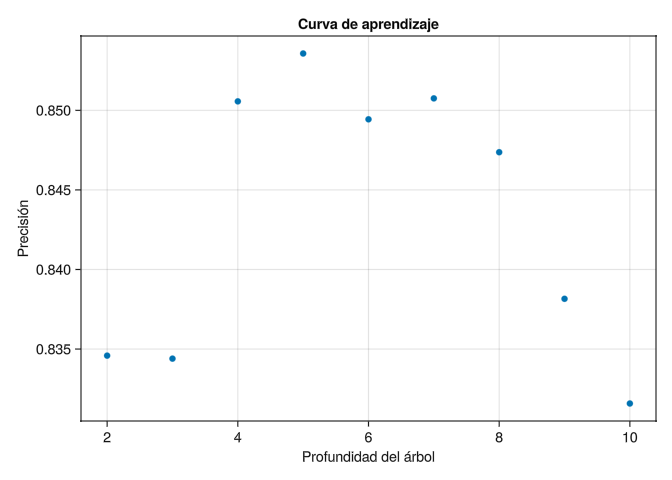

In [35]:
# Instanciamos el modelo de √°rbol de decisi√≥n.
arbol = Tree()
# Definimos una m√°quina de aprendizaje con el modelo, las variables predictivas y la variable objetivo.
mach = machine(arbol, X, y)
# Definimos el rango de valores a utilizar para ajustar los par√°metros del modelo.
r = range(arbol, :max_depth, lower=2, upper=10)
# Dibujamos la curva de aprendizaje.
curva = learning_curve(mach, range = r, resampling = StratifiedCV(rng = 123), measure = accuracy)
# Dibujamos la curva de aprendizaje.
fig = Figure()
ax = Axis(fig[1, 1], title = "Curva de aprendizaje", xlabel = "Profundidad del √°rbol", ylabel = "Precisi√≥n")
Makie.scatter!(ax, curva.parameter_values, curva.measurements)
fig

In [36]:
# Instanciamos el modelo de √°rbol de decisi√≥n.
arbol = Tree(max_depth = 4)
# Definimos una m√°quina de aprendizaje con el modelo, las variables predictivas y la variable objetivo.
mach = machine(arbol, X, y)
# Ajustamos los par√°metros del modelo.
MLJ.fit!(mach)
# Visualizamos el √°rbol de decisi√≥n.
fitted_params(mach).tree

[ Info: Training machine(DecisionTreeClassifier(max_depth = 4, ‚Ä¶), ‚Ä¶).


alcohol < 10.62
‚îú‚îÄ meses_barrica < 8.5
‚îÇ  ‚îú‚îÄ acided_volatil < 0.3125
‚îÇ  ‚îÇ  ‚îú‚îÄ acided_volatil < 0.2025
‚îÇ  ‚îÇ  ‚îÇ  ‚îú‚îÄ  ‚òπÔ∏è  (408/496)
‚îÇ  ‚îÇ  ‚îÇ  ‚îî‚îÄ  ‚òπÔ∏è  (1095/1172)
‚îÇ  ‚îÇ  ‚îî‚îÄ meses_barrica < 5.5
‚îÇ  ‚îÇ     ‚îú‚îÄ  ‚òπÔ∏è  (1334/1345)
‚îÇ  ‚îÇ     ‚îî‚îÄ  ‚òπÔ∏è  (51/58)
‚îÇ  ‚îî‚îÄ  üòä  (25/25)
‚îî‚îÄ meses_barrica < 12.5
   ‚îú‚îÄ cloruro_sodico < 0.0455
   ‚îÇ  ‚îú‚îÄ alcohol < 12.55
   ‚îÇ  ‚îÇ  ‚îú‚îÄ  ‚òπÔ∏è  (751/1160)
   ‚îÇ  ‚îÇ  ‚îî‚îÄ  üòä  (185/286)
   ‚îÇ  ‚îî‚îÄ meses_barrica < 10.5
   ‚îÇ     ‚îú‚îÄ  ‚òπÔ∏è  (552/629)
   ‚îÇ     ‚îî‚îÄ  üòä  (25/43)
   ‚îî‚îÄ alcohol < 14.45
      ‚îú‚îÄ  üòä  (105/105)
      ‚îî‚îÄ  ‚òπÔ∏è  (1/1)


In [37]:
# Calculamos la importancia de cada variable.
feature_importances(mach)

13-element Vector{Pair{Symbol, Float64}}:
              :alcohol => 0.5303315899204789
        :meses_barrica => 0.26854115615561525
       :acided_volatil => 0.1040970236546446
       :cloruro_sodico => 0.09703023026926123
                 :tipo => 0.0
          :acided_fija => 0.0
        :acido_citrico => 0.0
      :azucar_residual => 0.0
 :dioxido_azufre_libre => 0.0
 :dioxido_azufre_total => 0.0
             :densidad => 0.0
                   :ph => 0.0
             :sulfatos => 0.0

In [38]:
MLJ.predict(mach, X[1:10, :])

10-element CategoricalDistributions.UnivariateFiniteVector{OrderedFactor{2}, String, UInt32, Float64}:
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.992,  üòä =>0.00818)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.823,  üòä =>0.177)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.992,  üòä =>0.00818)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.992,  üòä =>0.00818)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.647,  üòä =>0.353)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.647,  üòä =>0.353)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.647,  üòä =>0.353)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.878,  üòä =>0.122)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.992,  üòä =>0.00818)
 UnivariateFinite{OrderedFactor{2}}( ‚òπÔ∏è =>0.992,  üòä =>0.00818)

In [39]:
predict_mode(mach, X[1:10, :])

10-element CategoricalArray{String,1,UInt32}:
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "
 " ‚òπÔ∏è "